<a href="https://colab.research.google.com/github/Sarvesh-Kesharwani/HouseDataPrediction_kaggle/blob/deploy/Kaggle/house_price_sumbmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/ahsanulislam/deep-learning-with-pca-for-regression-analysis/notebook#Model-Summary

In [284]:
#Basic Libraries
#####################################
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


## Tensorflow
################################
import tensorflow as tf


## Scikit Learn elements
########################################
import sklearn
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler as sscl
from sklearn.preprocessing import LabelEncoder as lblencd
from sklearn.model_selection import train_test_split as tts

In [285]:
import pandas as pd
# dftrain=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
# dftest =pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

dftrain = pd.read_csv('source/train.csv')
dftest = pd.read_csv('source/test.csv')

In [286]:
print('-'*40)
print('Train Dataset Shape : {}'.format(dftrain.shape))
print('-'*40)
print('Test Dataset Shape : {}'.format(dftest.shape))
print('-'*40)

----------------------------------------
Train Dataset Shape : (1460, 81)
----------------------------------------
Test Dataset Shape : (1459, 80)
----------------------------------------


In [287]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [288]:
train_null = (dftrain.isnull().sum()/dftrain.shape[0]*100).sort_values(ascending=False)
print(train_null.to_string())

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [289]:
test_null = (dftest.isnull().sum()/dftest.shape[0]*100).sort_values(ascending=False)
print(test_null.to_string())

PoolQC           99.794380
MiscFeature      96.504455
Alley            92.666210
Fence            80.123372
FireplaceQu      50.034270
LotFrontage      15.558602
GarageYrBlt       5.346127
GarageQual        5.346127
GarageFinish      5.346127
GarageCond        5.346127
GarageType        5.209047
BsmtCond          3.084304
BsmtQual          3.015764
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinType2      2.878684
MasVnrType        1.096642
MasVnrArea        1.028101
MSZoning          0.274160
BsmtHalfBath      0.137080
Utilities         0.137080
Functional        0.137080
BsmtFullBath      0.137080
BsmtFinSF1        0.068540
BsmtFinSF2        0.068540
BsmtUnfSF         0.068540
KitchenQual       0.068540
TotalBsmtSF       0.068540
Exterior2nd       0.068540
GarageCars        0.068540
Exterior1st       0.068540
GarageArea        0.068540
SaleType          0.068540
MiscVal           0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
YrSold            0.000000
T

In [290]:
features_train = dftrain.iloc[:,0:80]
label_train = dftrain.iloc[:,80]

In [291]:
########################### MSZoning ###############################

dftest['MSZoning']=dftest['MSZoning'].fillna(dftest.MSZoning.mode()[0])

########################### LotFrontage###############################

dftest['LotFrontage']=dftest.groupby('Neighborhood')['LotFrontage'].transform(lambda a: a.fillna(a.median()))


########################### Alley ###############################

dftest['Alley']=dftest['Alley'].fillna('No')


########################### Utilities ###############################

dftest['Utilities']=dftest['Utilities'].fillna(dftest.Utilities.mode()[0])



########################### Exterior1st ###############################

dftest['Exterior1st']=dftest['Exterior1st'].fillna('No')

########################### Exterior2nd ###############################

dftest['Exterior2nd']=dftest['Exterior2nd'].fillna('No')




########################### BsmtQual ###############################

dftest['BsmtQual']=dftest['BsmtQual'].fillna('No')


########################### BsmtExposure ###############################

dftest['BsmtExposure']=dftest['BsmtExposure'].fillna('No')


########################### BsmtCond ###############################

dftest['BsmtCond']=dftest['BsmtCond'].fillna('No')


########################### BsmtFinType1 ###############################

dftest['BsmtFinType1']=dftest['BsmtFinType1'].fillna('No')

########################### BsmtFinType2 ###############################

dftest['BsmtFinType2']=dftest['BsmtFinType2'].fillna('No')


#####'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'###

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    dftest[col] = dftest[col].fillna(0)





########################### KitchenQual ###############################

dftest['KitchenQual']=dftest.KitchenQual.fillna(dftest.KitchenQual.mode()[0])


########################### FireplaceQu ###############################

dftest['FireplaceQu']=dftest['FireplaceQu'].fillna('No')

########################### GarageType   ###############################

dftest['GarageType']=dftest['GarageType'].fillna('No')

########################### GarageFinish ###############################

dftest['GarageFinish']=dftest['GarageFinish'].fillna('No')


########################### GarageYrBlt ###############################

dftest['GarageYrBlt']=dftest['GarageYrBlt'].fillna(0)


########################### GarageQual ###############################

dftest['GarageQual']=dftest['GarageQual'].fillna('No')


########################### GarageCond ###############################

dftest['GarageCond']=dftest['GarageCond'].fillna('No')



########################### GarageCars ###############################

dftest['GarageCars']=dftest['GarageCars'].fillna(dftest['GarageCars'].median())

########################### GarageArea ###############################

dftest['GarageArea']=dftest['GarageArea'].fillna(dftest['GarageArea'].median())


########################### PoolQC ###############################

dftest['PoolQC']=dftest['PoolQC'].fillna('No')


########################### Fence ###############################

dftest['Fence']=dftest['Fence'].fillna('No')


########################### MiscFeature ###############################

dftest['MiscFeature']=dftest['MiscFeature'].fillna('No')



########################### MasVnrType ###############################

dftest['MasVnrType']=dftest['MasVnrType'].fillna('No')


########################### MasVnrArea ###############################

dftest['MasVnrArea']=dftest['MasVnrArea'].fillna(0)


########################### SaleType ###############################

dftest['SaleType']=dftest['SaleType'].fillna(dftest['SaleType'].mode()[0])

In [292]:
test_id=dftest['Id']
features_train = features_train.drop("Id", axis='columns')
dftest = dftest.drop("Id", axis='columns')

In [293]:
# cat->num, LabelEncoding
cols=list(dftest.columns)

############################## Label Encoding for Train #############
le=lblencd()

for i in cols:
    if str(features_train[i].dtype)=='object':
        features_train[i]=le.fit_transform(features_train[i])
        
        
############################## Label Encoding for Test #############

for i in cols:
    if str(dftest[i].dtype)=='object':
        dftest[i]=le.fit_transform(dftest[i])

In [294]:
# checking missing values again after imputation
import pandas
features_train = pandas.DataFrame(features_train)
display(features_train.isnull().sum())
display(features_train)

# imputing missing values using mean
features_train = pandas.DataFrame(features_train)
features_train['LotFrontage'] = features_train['LotFrontage'].fillna(features_train['LotFrontage'].mean())


# checking missing values again after imputation
import pandas
features_train = pandas.DataFrame(features_train)
display(features_train.isnull().sum())
display(features_train)

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,0,3,4,4,0,2,2008,8,4
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,0,3,4,4,0,5,2007,8,4
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,0,3,4,4,0,9,2008,8,4
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,0,3,4,4,0,2,2006,8,0
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,0,3,4,4,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,2,3,3,0,4,...,0,0,3,4,4,0,8,2007,8,4
1456,20,3,85.0,13175,1,2,3,3,0,4,...,0,0,3,2,4,0,2,2010,8,4
1457,70,3,66.0,9042,1,2,3,3,0,4,...,0,0,3,0,2,2500,5,2010,8,4
1458,20,3,68.0,9717,1,2,3,3,0,4,...,0,0,3,4,4,0,4,2010,8,4


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,0,3,4,4,0,2,2008,8,4
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,0,3,4,4,0,5,2007,8,4
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,0,3,4,4,0,9,2008,8,4
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,0,3,4,4,0,2,2006,8,0
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,0,3,4,4,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,2,3,3,0,4,...,0,0,3,4,4,0,8,2007,8,4
1456,20,3,85.0,13175,1,2,3,3,0,4,...,0,0,3,2,4,0,2,2010,8,4
1457,70,3,66.0,9042,1,2,3,3,0,4,...,0,0,3,0,2,2500,5,2010,8,4
1458,20,3,68.0,9717,1,2,3,3,0,4,...,0,0,3,4,4,0,4,2010,8,4


,MasVnrArea,GarageYrBlt
0,196.0,2003.0
1,0.0,1976.0
2,162.0,2001.0
3,0.0,1998.0
4,350.0,2000.0
...,...,...
1455,0.0,1999.0
1456,119.0,1978.0
1457,0.0,1941.0
1458,0.0,1950.0


C:\Users\sarve\AppData\Local\Temp\ipykernel_8484\4111471576.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<AxesSubplot: >

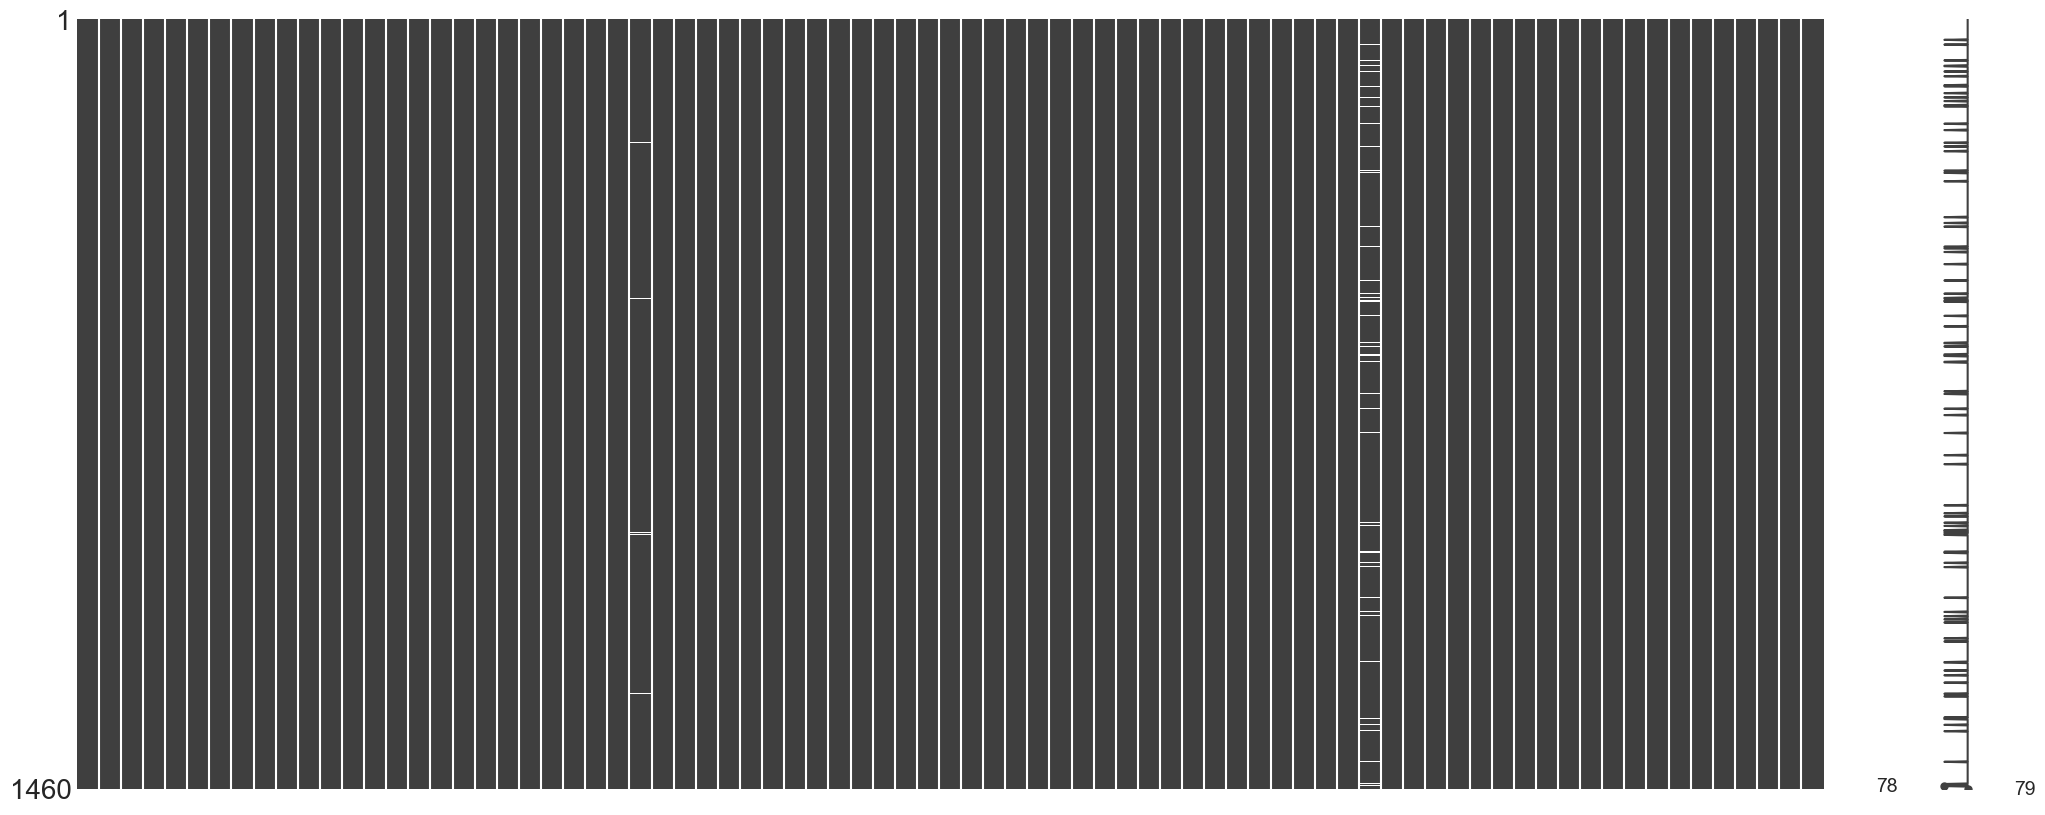

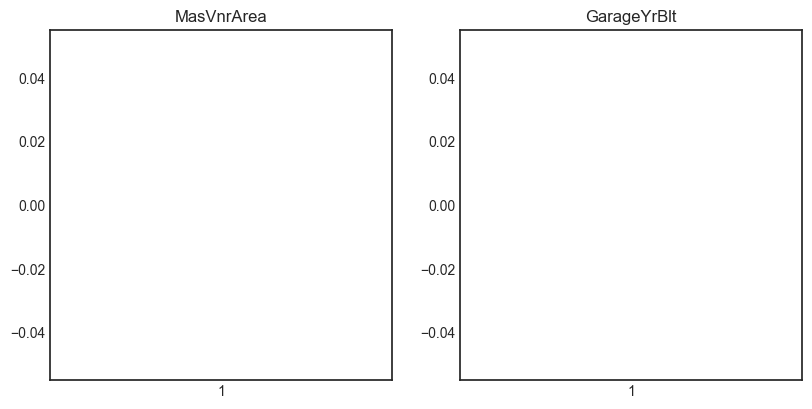

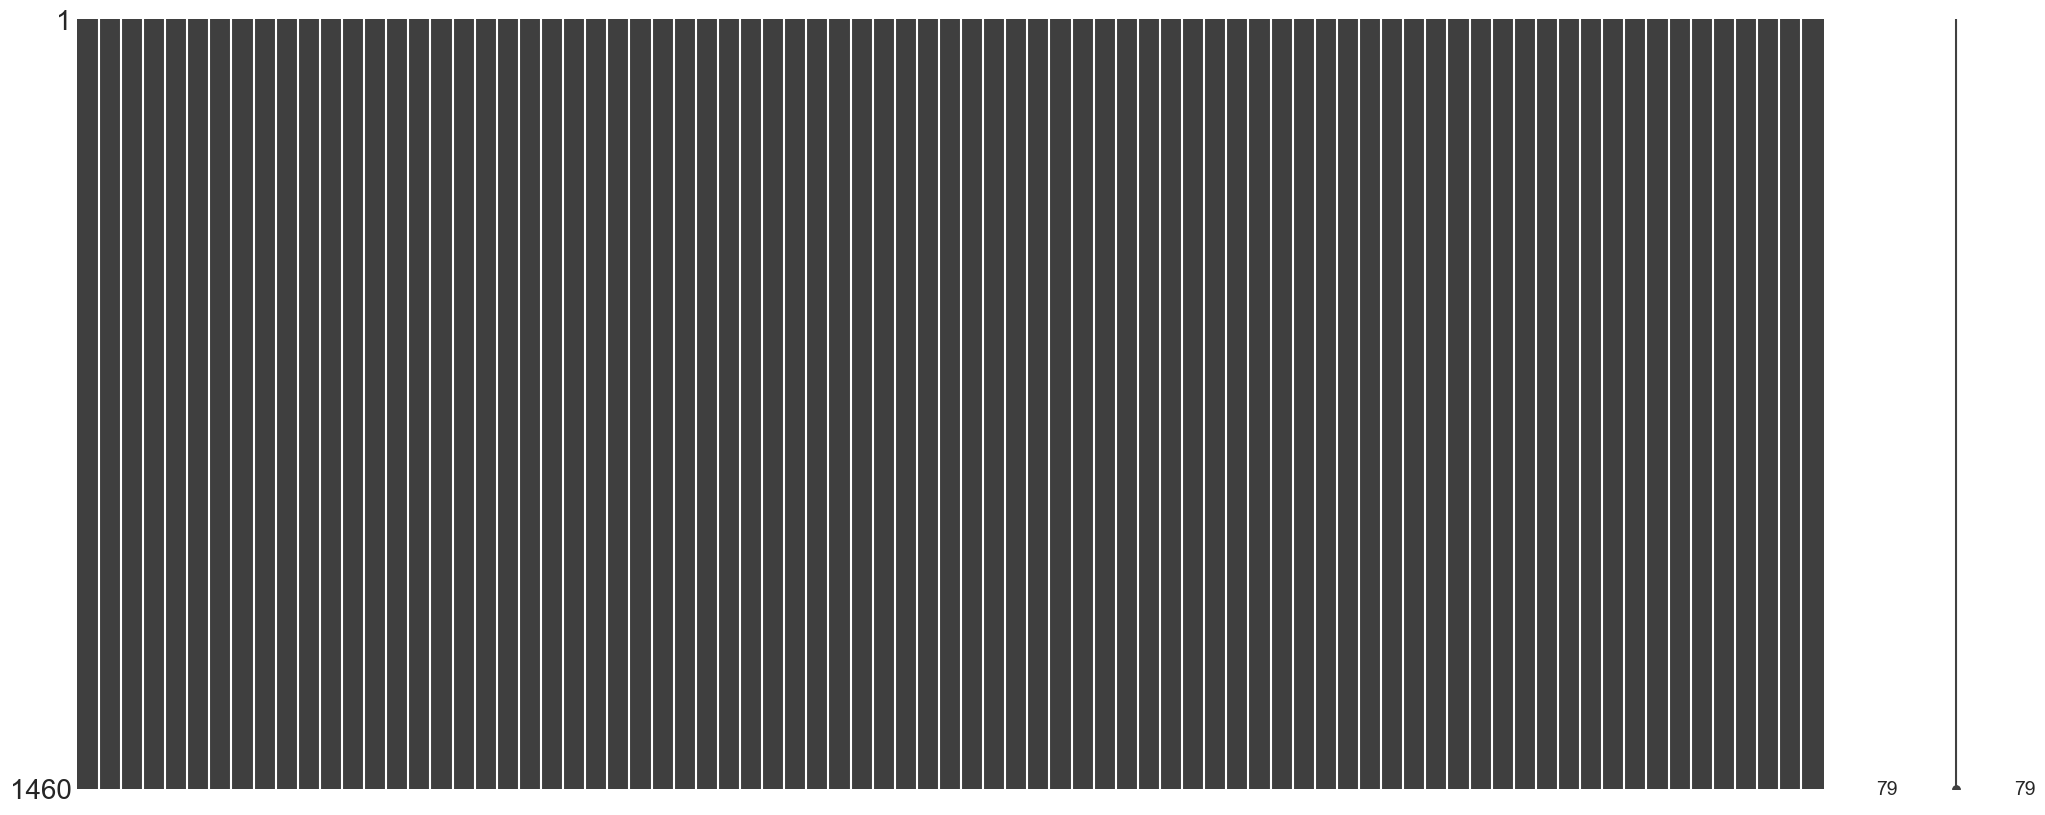

In [295]:
# listing cols having missing values
import missingno as msno
msno.matrix(features_train)
cols=[]
for col in features_train.columns:
    if features_train[col].isnull().sum().astype(bool):
        cols.append(col)
display(features_train[cols])

# checking outlier's existance in these cols
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')

ax=plt.subplot(234)
plt.boxplot(features_train[cols[0]])
ax.set_title(cols[0])

ax=plt.subplot(235)
plt.boxplot(features_train[cols[1]])
ax.set_title(cols[1])

# imputing missing values
for col in cols:
    mean_value = features_train[col].mean()
    features_train[col] = features_train[col].fillna(mean_value)
    
# checking missing values again after imputation
import pandas
features_train = pandas.DataFrame(features_train)
import missingno as msno
msno.matrix(features_train)

In [296]:
scaler=sscl()
################################## Train Set ##########################
features_train= scaler.fit_transform(features_train)
    
    
################################## Test Set ###############################
dftest= scaler.fit_transform(dftest)

In [297]:
# checking missing values again after imputation
import pandas
features_train = pandas.DataFrame(features_train)
display(features_train.isnull().sum().astype(bool).value_counts())

# display(features_train)

False    79
dtype: int64

In [298]:
##################################### Fitting PCA ###########################
pcas = pca(.9)
pcas.fit(features_train)
print("Number of PCA components are : {0}".format(pcas.n_components_))

##################################### Transform the Data ##################
train = pcas.fit_transform(features_train)
test  = pcas.fit_transform(dftest)

Number of PCA components are : 50


In [299]:
train,val,label_train,label_val=tts(train,label_train,test_size=0.2,random_state=42)

Building Neural Network Model for Prediction

In [300]:
#Build the neural network
import tensorflow as tf
tf.random.set_seed(42)

#create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

#fit the model
history=model.fit(train, label_train, validation_data=(val, label_val), epochs=1000, batch_size=10, verbose=0)

In [301]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6528      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               1

Text(0.5, 0, 'Epochs')

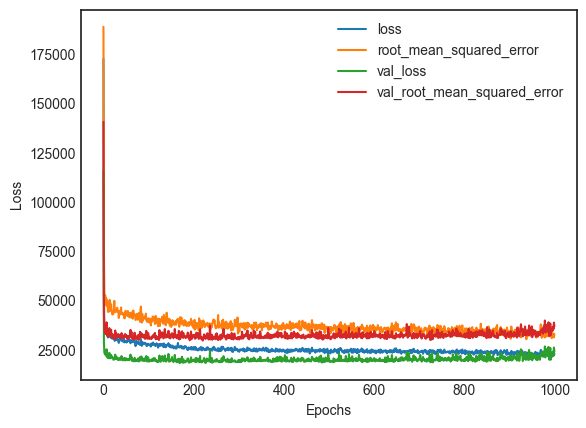

In [302]:
#plot history (Also known as loss  curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [308]:
price = np.round(model.predict(test),2)
pred=[]
for i in range(len(price)):
    pred.append(price[i][0])

sub={'Id':test_id,'SalePrice':pred}

submission=pd.DataFrame(sub)

submission.head()

submission.to_csv("submission.csv", index=False)

ValueError: in user code:

    File "C:\Users\sarve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\sarve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sarve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\sarve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "C:\Users\sarve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\sarve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 50, but received input with shape (None, 51)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 51), dtype=float32)
      • training=False
      • mask=None


In [309]:
# this error came just before finishing up by submission
# so lets try a diff submissor's NB